<a href="https://colab.research.google.com/github/Eswari-21/FR-HNS-/blob/main/FR_(HNS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install DeepFace
!pip install deepface matplotlib

print("DeepFace installation complete.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.1 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=e0f06edffdc8f01f5d27e1a9600dd4bfbbbbe9c42c557adc342988ee6a80efa5
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
DeepFace installation complete.


Using uploaded image: /content/group.jpg


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5


25-06-28 04:32:49 - facial_expression_model_weights.h5 will be downloaded...


100%|██████████| 5.98M/5.98M [00:00<00:00, 231MB/s]


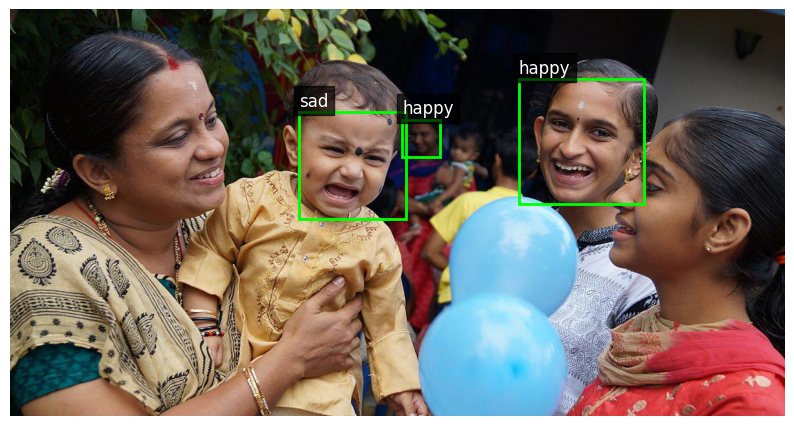

In [6]:

from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

# Load image
# It seems you previously uploaded an image. Let's try to use the uploaded image filename.
# Assuming 'image_filename' from a previous cell holds the name of the uploaded image.
# If not, you will need to upload the image again or specify its path.
try:
    # Use the filename from the previous upload cell if available
    image_path = "/content/group.jpg"
    print(f"Using uploaded image: {image_path}")
except NameError:
    print("Image filename not found. Please upload an image or specify the path.")
    # Add code to upload the image here if image_filename is not defined
    print("Uploading your image for DeepFace analysis...")
    uploaded_deepface = files.upload()
    image_path = next(iter(uploaded_deepface))
    print(f"Uploaded image: {image_path}")


img = cv2.imread(image_path)

# Check if image was loaded successfully
if img is None:
    print(f"Error: Could not load image from {image_path}. Please ensure the file exists.")
else:
    # Convert BGR to RGB for DeepFace and Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Analyze image: actions = ['emotion']
    # enforce_detection=False can be useful if the image is not a typical face portrait,
    # but it might also lead to less accurate results or errors if no face is detected.
    # Consider removing enforce_detection=False if you expect clear faces.
    try:
        # DeepFace.analyze returns a list of results, one for each detected face.
        result = DeepFace.analyze(img_path=image_path, actions=['emotion'], enforce_detection=False)

        # Plot result with face and emotion labels
        plt.figure(figsize=(10, 8))
        plt.imshow(img_rgb)
        plt.axis("off")

        if result: # Check if any faces were detected and analyzed
             # Draw rectangles and emotion labels for each detected face
            for face in result:
                # Ensure 'region' and 'dominant_emotion' keys exist
                if 'region' in face and 'dominant_emotion' in face:
                    x, y, w, h = face['region']['x'], face['region']['y'], face['region']['w'], face['region']['h']
                    emotion = face['dominant_emotion']
                    plt.gca().add_patch(plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='lime', facecolor='none'))
                    plt.text(x, y - 10, emotion, fontsize=12, color='white', bbox=dict(facecolor='black', alpha=0.7))
                else:
                    print("Warning: Skipping a result entry missing 'region' or 'dominant_emotion'.")

            plt.show()
        else:
            print("DeepFace did not detect any faces in the image or analyze them.")

    except Exception as e:
        print(f"An error occurred during DeepFace analysis: {e}")